# MiniGrid Tester

In [33]:
import gymnasium as gym
from minigrid.wrappers import ImgObsWrapper, FullyObsWrapper
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv, VecVideoRecorder
from discovery.environments.custom_minigrids import TwoRoomEnv
import numpy as np
import matplotlib.pyplot as plt
import torch
import os
from stable_baselines3 import PPO
from discovery.utils.feat_extractors import (
    ClimbingFeatureExtractor,
    MinigridFeaturesExtractor,
)
from stable_baselines3.common.utils import obs_as_tensor


from discovery.utils import sg_detection 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import copy
import tqdm
import torch.nn as nn
import torch.optim as optim
import importlib

import functools

from importlib import reload

sg_detection = importlib.reload(sg_detection)


In [41]:
from discovery.class_analysis import lib
lib = reload(lib)


In [35]:
obss, images, labels, coords, dirs = lib.create_dataset()
print("Number of observations: ", len(obss))

Number of observations:  292


In [9]:
obss[0][0].shape

(15, 8, 3)

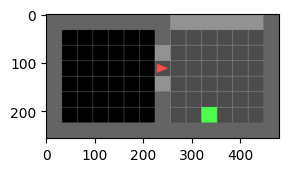

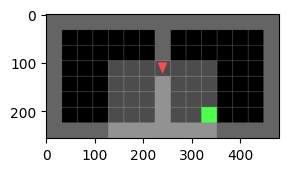

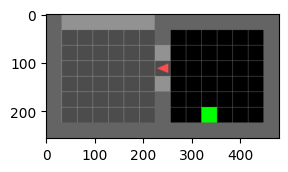

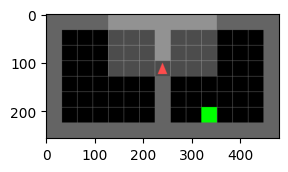

In [10]:
for idx, image in enumerate(images):
    if labels[idx] == 1:
        plt.figure(figsize=(3, 3))
        plt.imshow(image)


In [16]:
# load the model trained on single task setting
model = PPO.load("/Users/szepi1991/Code/discovery/experiments/FeatAct_minigrid/models/PPO_TwoRoomEnv_5i6lt53x.zip")
# model = PPO.load("/Users/kevinroice/Documents/research/discovery/experiments/FeatAct_minigrid/models/PPO_TwoRoomEnv_oesjuzgc.zip")

In [17]:
feats = lib.obs_to_feats(model, obss)

In [18]:
clf = sg_detection.LinearClassifier(input_size=32)
acc = lib.train_classifier(clf, feats, labels)

Epoch 499: 100%|██████████| 8/8 [00:00<00:00, 1160.29batch/s, acc=0.333, loss=0.682]


In [23]:
accuracy, conf_mat = lib.see_log_reg(clf, feats, labels, coords, dirs)

tensor([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
        [ nan, 0.49, 0.50, 0.50, 0.50, 0.50, 0.50,  nan, 0.50, 0.50, 0.51, 0.51, 0.51, 0.51],
        [ nan, 0.50, 0.51, 0.51, 0.50, 0.50, 0.50,  nan, 0.53, 0.49, 0.44, 0.47, 0.48, 0.50],
        [ nan, 0.50, 0.52, 0.52, 0.52, 0.50, 0.50, 0.53, 0.52, 0.50, 0.47, 0.49, 0.51, 0.51],
        [ nan, 0.49, 0.49, 0.50, 0.51, 0.50, 0.49,  nan, 0.51, 0.48, 0.46, 0.49, 0.50, 0.51],
        [ nan, 0.49, 0.50, 0.51, 0.51, 0.49, 0.49,  nan, 0.52, 0.51, 0.47, 0.49, 0.50, 0.50],
        [ nan, 0.50, 0.50, 0.50, 0.50, 0.51, 0.48,  nan, 0.51, 0.52, 0.50, 0.49, 0.49, 0.50]])
tensor([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
        [ nan, 0.51, 0.50, 0.50, 0.50, 0.50, 0.51,  nan, 0.50, 0.51, 0.51, 0.51, 0.51, 0.51],
        [ nan, 0.47, 0.50, 0.51, 0.50, 0.49, 0.50,  nan, 0.50, 0.49, 0.49, 0.50, 0.51, 0.50],
        [ nan, 0.46, 0.51, 0.52, 0.51, 0.50, 0.49, 0.52, 0.

In [24]:
clf_nonlin = sg_detection.NonLinearClassifier(input_size=32, hidden_size=64)
acc_nonlin = lib.train_classifier(clf_nonlin, feats, labels)

Epoch 499: 100%|██████████| 8/8 [00:00<00:00, 277.90batch/s, acc=1, loss=0.36]     


In [25]:
accuracy, conf_mat = lib.see_log_reg(clf, feats, labels, coords, dirs)

tensor([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
        [ nan, 0.49, 0.50, 0.50, 0.50, 0.50, 0.50,  nan, 0.50, 0.50, 0.51, 0.51, 0.51, 0.51],
        [ nan, 0.50, 0.51, 0.51, 0.50, 0.50, 0.50,  nan, 0.53, 0.49, 0.44, 0.47, 0.48, 0.50],
        [ nan, 0.50, 0.52, 0.52, 0.52, 0.50, 0.50, 0.53, 0.52, 0.50, 0.47, 0.49, 0.51, 0.51],
        [ nan, 0.49, 0.49, 0.50, 0.51, 0.50, 0.49,  nan, 0.51, 0.48, 0.46, 0.49, 0.50, 0.51],
        [ nan, 0.49, 0.50, 0.51, 0.51, 0.49, 0.49,  nan, 0.52, 0.51, 0.47, 0.49, 0.50, 0.50],
        [ nan, 0.50, 0.50, 0.50, 0.50, 0.51, 0.48,  nan, 0.51, 0.52, 0.50, 0.49, 0.49, 0.50]])
tensor([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
        [ nan, 0.51, 0.50, 0.50, 0.50, 0.50, 0.51,  nan, 0.50, 0.51, 0.51, 0.51, 0.51, 0.51],
        [ nan, 0.47, 0.50, 0.51, 0.50, 0.49, 0.50,  nan, 0.50, 0.49, 0.49, 0.50, 0.51, 0.50],
        [ nan, 0.46, 0.51, 0.52, 0.51, 0.50, 0.49, 0.52, 0.

# Newer variant

In [43]:


minigrid = lib.MiniGridData()
obs_to_feats = functools.partial(lib.obs_to_feats, model)
obss, images, labels = minigrid.get_data()
feats = obs_to_feats(obss)
clf = sg_detection.LinearClassifier(input_size=32)
best_acc = lib.train_classifier(clf, feats, labels)


Epoch 499: 100%|██████████| 8/8 [00:00<00:00, 1167.84batch/s, acc=0.889, loss=0.669]


In [44]:
acc, conf_mat = lib.evaluate(clf, feats, labels)
minigrid.visualize(clf, obs_to_feats)

print("Accuracy: ", acc)
print("Confusion matrix: \n", conf_mat)


tensor([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
        [ nan, 0.49, 0.50, 0.50, 0.50, 0.50, 0.50,  nan, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50],
        [ nan, 0.49, 0.51, 0.51, 0.51, 0.51, 0.50,  nan, 0.52, 0.48, 0.42, 0.46, 0.48, 0.50],
        [ nan, 0.47, 0.49, 0.51, 0.50, 0.50, 0.51, 0.53, 0.52, 0.51, 0.47, 0.49, 0.50, 0.50],
        [ nan, 0.49, 0.50, 0.50, 0.50, 0.49, 0.49,  nan, 0.49, 0.45, 0.43, 0.48, 0.50, 0.50],
        [ nan, 0.49, 0.51, 0.52, 0.51, 0.49, 0.48,  nan, 0.50, 0.49, 0.45, 0.48, 0.49, 0.50],
        [ nan, 0.51, 0.50, 0.50, 0.50, 0.50, 0.48,  nan, 0.49, 0.49, 0.49, 0.48, 0.49, 0.50]])
tensor([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
        [ nan, 0.51, 0.50, 0.50, 0.50, 0.50, 0.50,  nan, 0.49, 0.50, 0.50, 0.50, 0.50, 0.50],
        [ nan, 0.47, 0.50, 0.50, 0.50, 0.48, 0.49,  nan, 0.49, 0.49, 0.48, 0.50, 0.50, 0.50],
        [ nan, 0.46, 0.50, 0.52, 0.50, 0.50, 0.49, 0.52, 0.

In [5]:
import wandb
api = wandb.Api()

# run = api.run("//<run_id>")
run = api.run("//TwoRoomsSingleTask/hv0www3u")
# run = api.run("//szepi/TwoRoomsSingleTask/hv0www3u")
# run.file("downloaded_config.yaml").download()
run.config

{'lr': 0.0003,
 'cnn': 'minigrid',
 'gamma': 0.99,
 'n_envs': 16,
 'learner': 'PPO',
 'n_steps': 128,
 'run_num': -1,
 'env_name': 'TwoRoomEnv',
 'feat_dim': 640,
 'n_epochs': 4,
 'timesteps': 1000000,
 'use_wandb': True,
 'activation': 'fta',
 'batch_size': 96,
 'train_freq': 1,
 'analyse_rep': False,
 'config_file': 'config.yaml',
 'policy_type': 'CnnPolicy',
 'render_mode': 'rgb_array',
 'project_name': 'TwoRoomsSingleTask',
 'record_video': False,
 'random_hallway': False,
 'learning_starts': 1000,
 'stats_window_size': 10,
 'exploration_final_eps': 0.1,
 'target_update_interval': 500}

# Look at the results over the 20 seeds.

In [25]:
import pickle
from discovery.class_analysis import run
from discovery.class_analysis import datatypes
from importlib import reload
import numpy as np
run = reload(run)
from discovery.utils import filesys



In [26]:
filesys.set_directory_in_project()
results = run.load_existing_results(run._RESULT_STORE)


Changed working directory to /Users/szepi1991/Code/discovery


In [27]:
for setting, data in results.items():
    print("setting:", setting)
    print("  num_runs: ", data.num_runs)
    print("  lin_acc_mean +- stderr: ", data.lin_acc_mean, "+-", data.lin_acc_std_err)
    print("  nonlin_acc_mean +- stderr: ", data.nonlin_acc_mean, "+-", data.nonlin_acc_std_err)


setting: Setting(multitask=False, model_type=<ModelType.FTA: 2>, env_name=<EnvName.TwoRooms: 1>)
  num_runs:  20
  lin_acc_mean +- stderr:  0.9305099487304688 +- 0.005094512250931477
  nonlin_acc_mean +- stderr:  0.9694806843996048 +- 0.0021518689417643283
setting: Setting(multitask=True, model_type=<ModelType.FTA: 2>, env_name=<EnvName.TwoRooms: 1>)
  num_runs:  20
  lin_acc_mean +- stderr:  0.9331746101379395 +- 0.010932220959090359
  nonlin_acc_mean +- stderr:  0.9541588574647903 +- 0.011300984542400068
setting: Setting(multitask=True, model_type=<ModelType.CNN: 1>, env_name=<EnvName.TwoRooms: 1>)
  num_runs:  20
  lin_acc_mean +- stderr:  0.9120238274335861 +- 0.022157039641192807
  nonlin_acc_mean +- stderr:  0.9395031929016113 +- 0.00708721923863444
setting: Setting(multitask=True, model_type=<ModelType.RANDOM_PROJ_GAUSS: 3>, env_name=<EnvName.TwoRooms: 1>)
  num_runs:  20
  lin_acc_mean +- stderr:  0.9345069408416748 +- 0.01743440588724445
  nonlin_acc_mean +- stderr:  0.9729780

In [67]:
import pandas as pd
import os
import dataclasses
import matplotlib.pyplot as plt

In [29]:
# pd.DataFrame.from_dict(results, orient="index")

,wandb_ids,num_runs,lin_accuracies,lin_conf_matrices,lin_acc_mean,lin_acc_std_err,nonlin_accuracies,nonlin_conf_matrices,nonlin_acc_mean,nonlin_acc_std_err
"Setting(multitask=False, model_type=<ModelType.FTA: 2>, env_name=<EnvName.TwoRooms: 1>)","[1itlnbj2, tgqdhch8, jaq1ddx8, 8oppyosv, pt6ti...",20,"[0.8630605936050415, 0.9496622085571289, 0.936...","[[[255, 33], [0, 4]], [[281, 7], [0, 4]], [[27...",0.930510,0.005095,"[0.9729780554771423, 0.9729780554771423, 0.972...","[[[288, 0], [0, 4]], [[288, 0], [0, 4]], [[288...",0.969481,0.002152
"Setting(multitask=True, model_type=<ModelType.FTA: 2>, env_name=<EnvName.TwoRooms: 1>)","[PPO_TwoRoomEnv_jtdce1k4, PPO_TwoRoomEnv_cwlr3...",20,"[0.9596547484397888, 0.969647228717804, 0.8464...","[[[284, 4], [0, 4]], [[287, 1], [0, 4]], [[250...",0.933175,0.010932,"[0.9729780554771423, 0.9729780554771423, 0.846...","[[[288, 0], [0, 4]], [[288, 0], [0, 4]], [[250...",0.954159,0.011301
"Setting(multitask=True, model_type=<ModelType.CNN: 1>, env_name=<EnvName.TwoRooms: 1>)","[x5jjdcr6, u5mtldih, zv4o8fly, rc08iywh, gniej...",20,"[0.8730531334877014, 0.7165040373802185, 0.603...","[[[258, 30], [0, 4]], [[210, 78], [1, 3]], [[1...",0.912024,0.022157,"[0.9396697282791138, 0.8763839602470398, 0.893...","[[[278, 10], [0, 4]], [[259, 29], [0, 4]], [[2...",0.939503,0.007087
"Setting(multitask=True, model_type=<ModelType.RANDOM_PROJ_GAUSS: 3>, env_name=<EnvName.TwoRooms: 1>)","[None, None, None, None, None, None, None, Non...",20,"[0.9529930353164673, 0.9729780554771423, 0.936...","[[[282, 6], [0, 4]], [[288, 0], [0, 4]], [[277...",0.934507,0.017434,"[0.9729780554771423, 0.9729780554771423, 0.972...","[[[288, 0], [0, 4]], [[288, 0], [0, 4]], [[288...",0.972978,0.000000
"Setting(multitask=True, model_type=<ModelType.RANDOM_PROJ_SPARSE: 4>, env_name=<EnvName.TwoRooms: 1>)","[None, None, None, None, None, None, None, Non...",20,"[0.9729780554771423, 0.9729780554771423, 0.972...","[[[288, 0], [0, 4]], [[288, 0], [0, 4]], [[288...",0.972978,0.000000,"[0.9729780554771423, 0.9729780554771423, 0.972...","[[[288, 0], [0, 4]], [[288, 0], [0, 4]], [[288...",0.972978,0.000000
"Setting(multitask=False, model_type=<ModelType.CNN: 1>, env_name=<EnvName.TwoRooms: 1>)","[arciq5xu, 5cc1cxom, 5li84sl8, 8xcxbyb0, hpx0v...",20,"[0.7631356716156006, 0.6132482886314392, 0.896...","[[[223, 65], [2, 2]], [[180, 108], [0, 4]], [[...",0.785619,0.054845,"[0.8197597861289978, 0.8430756330490112, 0.956...","[[[240, 48], [2, 2]], [[249, 39], [0, 4]], [[2...",0.941335,0.010295


In [48]:
df = pd.DataFrame([
    dataclasses.asdict(k) | dataclasses.asdict(v)
    for k, v in results.items()
])
df

,multitask,model_type,env_name,wandb_ids,num_runs,lin_accuracies,lin_conf_matrices,lin_acc_mean,lin_acc_std_err,nonlin_accuracies,nonlin_conf_matrices,nonlin_acc_mean,nonlin_acc_std_err
0,False,ModelType.FTA,EnvName.TwoRooms,"[1itlnbj2, tgqdhch8, jaq1ddx8, 8oppyosv, pt6ti...",20,"[0.8630605936050415, 0.9496622085571289, 0.936...","[[[255, 33], [0, 4]], [[281, 7], [0, 4]], [[27...",0.930510,0.005095,"[0.9729780554771423, 0.9729780554771423, 0.972...","[[[288, 0], [0, 4]], [[288, 0], [0, 4]], [[288...",0.969481,0.002152
1,True,ModelType.FTA,EnvName.TwoRooms,"[PPO_TwoRoomEnv_jtdce1k4, PPO_TwoRoomEnv_cwlr3...",20,"[0.9596547484397888, 0.969647228717804, 0.8464...","[[[284, 4], [0, 4]], [[287, 1], [0, 4]], [[250...",0.933175,0.010932,"[0.9729780554771423, 0.9729780554771423, 0.846...","[[[288, 0], [0, 4]], [[288, 0], [0, 4]], [[250...",0.954159,0.011301
2,True,ModelType.CNN,EnvName.TwoRooms,"[x5jjdcr6, u5mtldih, zv4o8fly, rc08iywh, gniej...",20,"[0.8730531334877014, 0.7165040373802185, 0.603...","[[[258, 30], [0, 4]], [[210, 78], [1, 3]], [[1...",0.912024,0.022157,"[0.9396697282791138, 0.8763839602470398, 0.893...","[[[278, 10], [0, 4]], [[259, 29], [0, 4]], [[2...",0.939503,0.007087
3,True,ModelType.RANDOM_PROJ_GAUSS,EnvName.TwoRooms,"[None, None, None, None, None, None, None, Non...",20,"[0.9529930353164673, 0.9729780554771423, 0.936...","[[[282, 6], [0, 4]], [[288, 0], [0, 4]], [[277...",0.934507,0.017434,"[0.9729780554771423, 0.9729780554771423, 0.972...","[[[288, 0], [0, 4]], [[288, 0], [0, 4]], [[288...",0.972978,0.000000
4,True,ModelType.RANDOM_PROJ_SPARSE,EnvName.TwoRooms,"[None, None, None, None, None, None, None, Non...",20,"[0.9729780554771423, 0.9729780554771423, 0.972...","[[[288, 0], [0, 4]], [[288, 0], [0, 4]], [[288...",0.972978,0.000000,"[0.9729780554771423, 0.9729780554771423, 0.972...","[[[288, 0], [0, 4]], [[288, 0], [0, 4]], [[288...",0.972978,0.000000
5,False,ModelType.CNN,EnvName.TwoRooms,"[arciq5xu, 5cc1cxom, 5li84sl8, 8xcxbyb0, hpx0v...",20,"[0.7631356716156006, 0.6132482886314392, 0.896...","[[[223, 65], [2, 2]], [[180, 108], [0, 4]], [[...",0.785619,0.054845,"[0.8197597861289978, 0.8430756330490112, 0.956...","[[[240, 48], [2, 2]], [[249, 39], [0, 4]], [[2...",0.941335,0.010295


In [52]:
head, tail = os.path.split(run._RESULT_STORE)
assert tail.endswith(".pkl")
csv_name = tail[:-4] + "_from_notebook.csv"
df.to_csv(os.path.join(head, csv_name), index=False)

## Make EnvTwoRooms Barcharts

In [65]:
proc_df = df.loc[df.env_name == datatypes.EnvName.TwoRooms][
    ["multitask", "model_type",
     "lin_acc_mean", "lin_acc_std_err",
     "nonlin_acc_mean", "nonlin_acc_std_err"]]

label_mapping = {
    (False, datatypes.ModelType.FTA): "Single-Task; FTA",
    (False, datatypes.ModelType.CNN): "Single-Task; CNN",
    (True, datatypes.ModelType.FTA): "Multi-Task; FTA",
    (True, datatypes.ModelType.CNN): "Multi-Task; CNN",
    (True, datatypes.ModelType.RANDOM_PROJ_GAUSS): "Random Sparse Proj.",
    (True, datatypes.ModelType.RANDOM_PROJ_SPARSE): "Random Sparse Proj.",
}

proc_df["label"] = proc_df.apply(
    lambda row: label_mapping[(row["multitask"], row["model_type"])], axis=1
)

proc_df.drop(columns=["multitask", "model_type"], inplace=True)
proc_df

,lin_acc_mean,lin_acc_std_err,nonlin_acc_mean,nonlin_acc_std_err,label
0,0.930510,0.005095,0.969481,0.002152,Single-Task; FTA
1,0.933175,0.010932,0.954159,0.011301,Multi-Task; FTA
2,0.912024,0.022157,0.939503,0.007087,Multi-Task; CNN
3,0.934507,0.017434,0.972978,0.000000,Random Sparse Proj.
4,0.972978,0.000000,0.972978,0.000000,Random Sparse Proj.
5,0.785619,0.054845,0.941335,0.010295,Single-Task; CNN


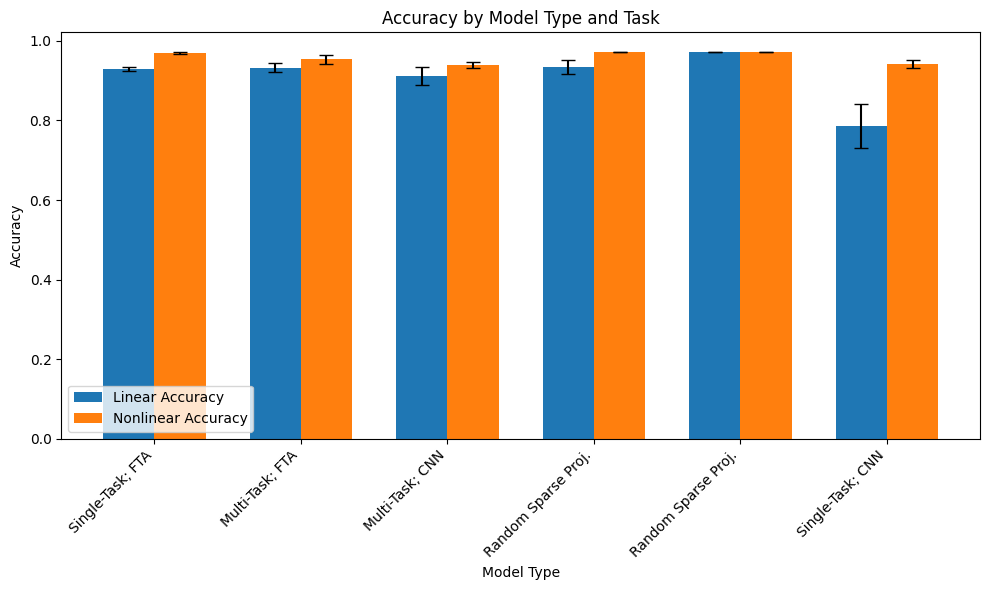

In [68]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Define the bar width and positions
bar_width = 0.35
index = np.arange(len(proc_df))

# Bar chart for lin_acc_mean
bars1 = ax.bar(index, proc_df['lin_acc_mean'], bar_width, yerr=proc_df['lin_acc_std_err'], label='Linear Accuracy', capsize=5)

# Bar chart for nonlin_acc_mean
bars2 = ax.bar(index + bar_width, proc_df['nonlin_acc_mean'], bar_width, yerr=proc_df['nonlin_acc_std_err'], label='Nonlinear Accuracy', capsize=5)

# Add some text for labels, title and axes ticks
ax.set_xlabel('Model Type')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Model Type and Task')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(proc_df['label'], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

In [30]:

pd.Series(pd.DataFrame.from_dict(results, orient="index")).reset_index()

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## Testing random projections

In [13]:
from sklearn import random_projection

feats = np.random.random((3, 64))
rand_projector_gauss = random_projection.GaussianRandomProjection(n_components=5)
rand_projector_gauss.fit(feats)

GaussianRandomProjection(n_components=5)

In [14]:
rand_projector_gauss.transform(feats)

array([[-0.7416723 ,  2.0459661 , -2.65933499,  2.09292411, -0.51055676],
       [-0.24762768, -1.27280052, -0.45190053, -0.96368839,  0.70353255],
       [-1.93606683,  0.23379554,  0.64434488,  1.94283459,  0.31341229]])

In [15]:
rand_projector_gauss.transform(feats)

array([[-0.7416723 ,  2.0459661 , -2.65933499,  2.09292411, -0.51055676],
       [-0.24762768, -1.27280052, -0.45190053, -0.96368839,  0.70353255],
       [-1.93606683,  0.23379554,  0.64434488,  1.94283459,  0.31341229]])

In [16]:
rand_projector_gauss.fit_transform(feats)

array([[ 2.24753524e+00, -1.01874328e-01, -8.90433539e-01,
        -1.49470402e+00, -5.77342663e+00],
       [ 2.37433486e+00,  8.92560873e-01,  1.84011536e-01,
        -3.09806906e+00, -5.49450829e+00],
       [ 8.88918919e-01,  6.59882869e-01,  4.98820579e-03,
        -2.56285073e+00, -4.70246419e+00]])

In [17]:
rand_projector_gauss.fit_transform(feats)

array([[-1.45675336, -3.40058722,  0.35729471,  0.28276997,  0.91785938],
       [ 0.76544038, -3.62078432, -2.02952876, -1.30706628,  3.35038322],
       [ 1.34259972, -2.18097635, -0.47289041, -0.0231884 ,  4.30992869]])

In [18]:
rand_projector_gauss.transform(feats)

array([[-1.45675336, -3.40058722,  0.35729471,  0.28276997,  0.91785938],
       [ 0.76544038, -3.62078432, -2.02952876, -1.30706628,  3.35038322],
       [ 1.34259972, -2.18097635, -0.47289041, -0.0231884 ,  4.30992869]])